## Import necessary packages tutorial

In [11]:
import renom as rm
from renom.utility.initializer import GlorotNormal, GlorotUniform
import gym

## Deifne the environment tutorial

In [12]:
env = gym.make('Pendulum-v0')

[2018-03-16 11:53:07,916] Making new env: Pendulum-v0


## Define the actor network tutorial

In [13]:
class Actor(rm.Model):
    
    '''Here considered 3-layer network (excluding input layer). Feel free to change the network depth 
    and check the results. The output-layer number of nuerons are equal to number of actions.
    In the example of OpenAI Gym's Pendlum-v0 environment number of actions are 1.'''
    
    def __init__(self, env, layer_size):
        self._layers = []
        self.env = env
        self._l1 = rm.Dense(layer_size[0], initializer=GlorotUniform())
        self._l2 = rm.Dense(layer_size[1], initializer=GlorotUniform())
        self._l3 = rm.Dense(self.env.action_space.shape[0], initializer=GlorotUniform())
        self._layers = [self._l1, self._l2, self._l3]
    
    def forward(self, x):
        '''Neural Network inputs are state information, outputs are actions. '''
        h1 = rm.relu(self._l1(x))
        h2 = rm.relu(self._l2(h1))
        h3 = rm.tanh(self._l3(h2)) 
        #h = self._l3(h2)
        h = h3*self.env.action_space.high[0]
        return h
    
    def weigiht_decay(self):
        '''To minimize over fitting considered L2-norm (it is an optional)'''
        weight_decay = 0
        for i in range(len(self._layers)):
            weight_decay += rm.sum(self._layers[i].params.w**2)
        return weight_decay


# Define the Critic network tutorial

In [14]:
class Critic(rm.Model):
    '''Here considered a 3-layer network (input layer, hidden layer-1, hidden layer-2, output layer)
        At input-layer state information, 2nd-hidden layer actions are applied, last layer has a single neuron'''
    def __init__(self, env, layer_size):        
        self._layers = []
        self.env = env
        self._l1 = rm.Dense(layer_size[0], initializer=GlorotUniform())
        self._l2 = rm.Dense(layer_size[1], initializer=GlorotUniform())
        self._l3 = rm.Dense(1, initializer=GlorotUniform())
        self._layers = [self._l1, self._l2, self._l3]
  
    def forward(self, x, action):
        '''Q(s,a) calculation for a given (state, action) pair'''
        h1 = rm.relu(self._l1(x))
        h2 = rm.relu(self._l2(rm.concat(h1,action))) # actions are applied at 2nd hidden layer
        h = self._l3(h2)        
        return h
    
    def weigiht_decay(self):
        '''To minimize over fitting considered L2-norm (it is an optional)'''
        weight_decay = 0
        for i in range(len(self._layers)):
            weight_decay += rm.sum(self._layers[i].params.w**2)
        return weight_decay

## Instantiating the actor & ciritic networks 

In [15]:
from renom.algorithm.reinforcement.ddpg_2 import DDPG
layer_size = [400, 300] # two-hidden layers dimension
actor_network = Actor(env=env,layer_size=layer_size)
critic_network = Critic(env=env, layer_size=layer_size)
target_actor_network = Actor(env=env,layer_size=layer_size)
target_critic_network = Critic(env=env, layer_size=layer_size)

## Instantiating the DDPG class

In [16]:
#ddpg = DDPG(env=env, actor_network=actor_network, critic_network=critic_network, \
#            target_actor_network=target_actor_network, target_critic_network=target_critic_network)
ddpg = DDPG(env=env) #, actor_network=None, critic_network=None)

In [17]:
[reward_list, loss_list]=ddpg.train(num_episodes=200)

episode 0 episode total reward  -1082.6092222972825
episode 1 episode total reward  -1346.3250858949257
episode 2 episode total reward  -1526.2378997887133
episode 3 episode total reward  -1548.7718429503866
episode 4 episode total reward  -1569.5285008685325
episode 5 episode total reward  -1495.5551587975228
episode 6 episode total reward  -1071.9464317798981
episode 7 episode total reward  -1643.9532832220257
episode 8 episode total reward  -1612.2541933932162
episode 9 episode total reward  -1862.225848763491
episode 10 episode total reward  -1098.9832684705505
episode 11 episode total reward  -1462.9827521641284
episode 12 episode total reward  -1505.2405326053079
episode 13 episode total reward  -1339.1737991381058
episode 14 episode total reward  -1611.7480587213129
episode 15 episode total reward  -1544.8186381029907
episode 16 episode total reward  -1210.1909880163798
episode 17 episode total reward  -1537.1884596197992
episode 18 episode total reward  -1647.592957912511
episo

episode 156 episode total reward  -242.4386761737787
episode 157 episode total reward  -119.66425067662658
episode 158 episode total reward  -128.6567550447815
episode 159 episode total reward  -126.57937041983068
episode 160 episode total reward  -127.97328305423234
episode 161 episode total reward  -244.22002877273823
episode 162 episode total reward  -130.05251315489983
episode 163 episode total reward  -126.51367112796723
episode 164 episode total reward  -313.3333293536653
episode 165 episode total reward  -121.36808179707151
episode 166 episode total reward  -280.0589378593093
episode 167 episode total reward  -127.4070102440135
episode 168 episode total reward  -125.57319039836764
episode 169 episode total reward  -125.17319126665772
episode 170 episode total reward  -240.3846772351705
episode 171 episode total reward  -125.79055940157488
episode 172 episode total reward  -128.46010869949757
episode 173 episode total reward  -122.06489532411142
episode 174 episode total reward  

In [18]:
test_reward_list = ddpg.test(render=False,episodes=20)

In [19]:
import matplotlib.pyplot as plt

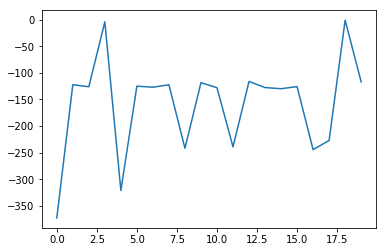

In [20]:
plt.plot(test_reward_list)